In [20]:
# In this lesson, we'll learn the fundamentals of ML and linear regression in the context of a problemn and generalize their definitions. The followingtopics are 
# covered: 
#  -Linear regression with multiple features
#  -Using numeric and categorical features
#  -Regression coefficients & features importance.
# Or more generally, the following topics are covered in this tutorial:
# - A typical problem statement for ML
# - Downloading and exploring a dataset for ML
# - Linear regression with one variable using Scikit-learn
# - Linear regerssion with multiple variables.
# - Using categorical features for ML
# - Regression coefficients and feature importance
# - Other models and techniques for regression using Scikit-learn
# - Applying linear regression to other datasets.
#__________________________________________________

In [21]:
# Let's now begin..
# We hava our dataset named "charges.csv"
# We can now create a Pandas dataframe using the donwloaded file, to view and analyze the data
import pandas as pd
medical_df = pd.read_csv('charges.csv')

In [22]:
print(medical_df.info()) #to check the data type of each column
#We can clearly observe that there're no null values, which is good news.
# print(medical_df.describe()) #In order to get statisctics for the numerical columns.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [23]:
#Now, let's explore the data by visualizing the distributions of values in some columns of the dataset, and relationships between "charges" and other columns.
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
# Plotly specifically because it gives us some interactive charts and save us some coding, but a lot of all these plots can be done using just matplotlib as well.
# The following settings will improve the default style and font sizes for our charts:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] =  '#00000000'

In [25]:
##Age:
# print(medical_df.age.describe())
fig = px.histogram(medical_df,
                   x ='age',
                   marginal='box',
                   nbins = 47,
                   #color_discrete_sequence=['orange'],
                   title= 'Distribution of Age')
fig.update_layout(bargap = 0.1)
fig.show()



In [26]:
## Let's visualize the distribution of "charges" i.e. the annual medial charges for customers. This is the column we're trying to predict. Let's also use the
# categorical column "smoker" to distinguish the charges for smokers and non-smokers.
fig = px.histogram(medical_df,
                   x = 'charges',
                   marginal= 'box',
                   color= 'smoker',
                   color_discrete_sequence= ['green', 'grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [27]:
## Smoker
#Let's visualize the distribution of the "smoker" column (containing values 'yes' and 'no') using a histogram
medical_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [28]:
px.histogram(medical_df,
             x='smoker',
             color= 'sex',
             title= ' Smoker '
             )

In [29]:
# So now, having looked at some individual columns, we can now visualize the relationship between 'charges' and the other columns.
# Each point in the scatter plot represents one customer. We'll also use values in the "smoker" column to color the points.
fig  = px.scatter(medical_df,
                  x = 'age',
                  y= 'charges',
                  color='smoker',
                  opacity= 0.8,
                  hover_data= ['sex'],
                  title = 'Age vs. Charges')
fig.update_traces(marker_size = 5)
fig.show() 


In [30]:
#Note: Whenever you observe a trend, summarize it and try to offer some explanation

# We can make the following observations from the above chart: 
# • The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, 
#and it's clear that age alone cannot be used to accurately determine medical charges. 
# • We can see three "clusters" of points, each of which seems to form a line with an increasing slope: 
# 1. The first and the largest cluster consists primary of presumably "healthy non-smokers"  who have relatively low medical charges compared to others 
# 2. The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: 
# "non-smokers with medical issues" and  "smokers without major medical issues". 
# 3. The final cluster consists exclusively of smokers, presumably smokers with major medical  issues that are possibly related to or worsened by smoking.

In [31]:
px.violin(medical_df, x ='children', y = 'charges')
#The width in the followng chart tells us how many values lie there relatively

In [32]:
#Correlation
# As we can tell from the analysis, the values in some columns are more closely related to the values in "charges" compared to other columns. E.g. "age"
# and "charges" seem to grow together, whereas "bmi" and "charges" don't.
#This relationship is often expressed numerically using a measure called the correlation coefficent, which can be computed using the .coor method of
# a Pandas series.

In [33]:
medical_df.charges.corr(medical_df.age)

0.29900819333064765

In [34]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362892

In [36]:
medical_df.charges.corr(medical_df.smoker) #You can't do this, because smoker isn't numeric 

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [37]:
#However, to compute the correlation for categorical columns (like the smoker column), they must first be converted into numeric columns
smoker_values = {'no': 0, 'yes':1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.7872514304984772

In [38]:
# Here's how correlation coefficients can be interpreted:
# ***Strength: The greater the absolute value of the correlation coefficient, the stronger the relationship.
#           - The extreme values of -1 and 1 indicate perfectly linear relationship where a change in one variable is acoompanied by a perfectly consistent
# change in the other. For these relationships, all of the data points fall on a line. In practice, we won't see either type of perfect relationship.
#           - A coefficient of zero represents no linear relationship. As one variable increases, there is no tendency in the other variable to either
# increase or decrease.
#           - When the value is in-between 0 and +1/-1, there is a relationship, but the points don't all fall on a line. As r approaches -1 or 1, the
# strength of the relationship increases and the data points tend to fall closer to a line.
#  ***Direction: The sign of the correlation coefficient represents the direction of the relationship. 
#           - Positive coefficients indicate that when the value of one variable increases, the value of the other variable also tends to increase.
# Positive relationships produce an upward slope on a scatterplot.
#           - Negative coefficients represent cases when the value of one variable increases, the value of the other variable tends to decrease. 
# Negative relationships produce a downward slope.


# |*                 
# |            *
# |          *
# |        *             Perfect positive correlation, and the opposite of it is "Perfect negative correlation"
# |      *
# |    *
# |  *
# |*____________________________


# |               **                 
# |            *
# |          ***         Strong positive correlation, and the opposite of it is "Strong negative correlation"
# |        *             
# |      * *
# |   * *
# |  *
# |*____________________________



# |      *              *                 
# |      *       *    *
# |          **           *
# |              *                   No correlation
# |  *               *
# |      *       *
# |  *        *          *
# |*____________________________


In [39]:
#The pandas dataframe also provide a corr method to compute the coorelation coefficients between all pairs of numeric columns
medical_df.corr() 
#The resutlt is called correlation matrix and is often visualized using a heatmap, because it's difficult to look at all these numbers and figure things 
# out.

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


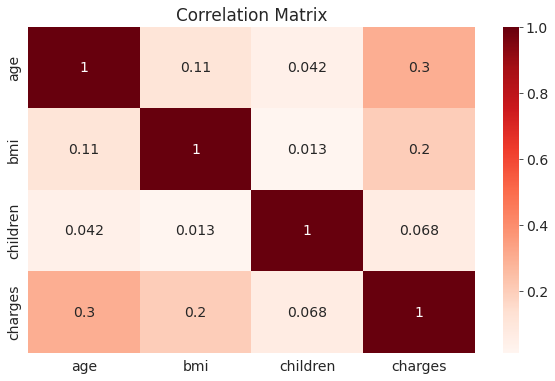

In [40]:
sns.heatmap(medical_df.corr(), cmap='Reds', annot= True)
plt.title ('Correlation Matrix');

In [41]:
# Correlation vs causation fallacy: Note that a high correlatn cannot be used to interpret a cause-effect relationship between features. The features X
# and Y can be coorrelated if X causes Y or if Y causes X, or if both are caused independently by some other factor Z, and the correlation will no longer
# hold true if one of the cause-effect relationships is broken. It's also possible that X and Y simply appear to be correlated because the sample is too 
# small.
# While this may seem obvious, computers can't differentiate between correlation and causation, and decisions based on automated system can often have
# major consequences on society, so it's important to study why automated systems lead to a given result.
# Determining cause-effect relationships requrires human insight.


## Linear Regression using a single feature

In [42]:
# We now know that the 'smoker' and 'age' columns have the strongest correlation with "charges".
# Let's try to find a way of estimating the value of "charges" using the value of "age" for non-smokers.
# First, let's create a dataframe containing just the data for non-smokers.
non_smoker_df = medical_df[medical_df.smoker == 'no']
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


<AxesSubplot:title={'center':'Age vs. Charges'}, xlabel='age', ylabel='charges'>

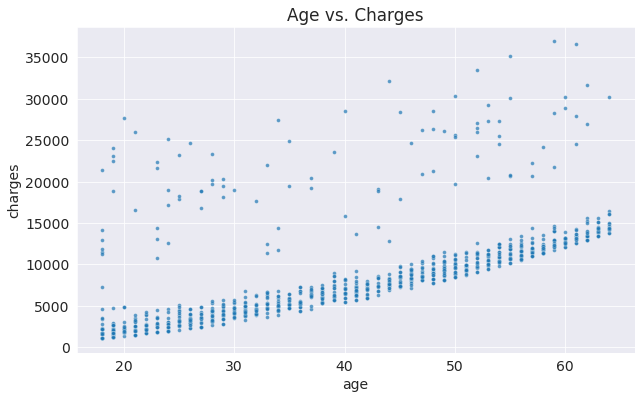

In [43]:
#Next, let's visualize the relationship between "age" and "charges"
plt.title('Age vs. Charges')
sns.scatterplot(data = non_smoker_df, x = 'age', y = 'charges', alpha = 0.7, s = 15)

In [44]:
#Apart from a few exceptions, the points seem to form a line. We'll try and "fit" a line using these points, and use the line to predict charges for 
# a given age. A line on the X&Y coordinates has the following formula: y = wx + b
# The line is characterized by two numbers: w (called "slope") and b (called "intercept").

In [45]:
##MODEL
# In the above case, the x axis shows "age" and the y axis shows "charges". Thus, we're assuming the following relationship between the two:
# charges = w * age + b [This equation is called "A linear regression model", because it's modeling the relationship between age and charges].
# Obviously this is not a perfect relationship; Medical charges depend on a lot more than age as we've already seen, and maybe we can't even predict 
# medical charges exactly, because there's a lot of uncertainty, but there's a certain trend we're trying to capture, because some information will be 
# more useful than no information. At least, knowing a persion at a hight age, we should probably be charged a higher premium is useful information that
# we'd like to draw.

In [46]:
# Let's define a helper function estimage_charges, to compute charges, given age, w and b.
def estimate_charges(age,w,b):
    return w * age + b

In [47]:
#Let's guess the values for w and b and use them to estimate the value for charges
w = 50
b = 100
ages = non_smoker_df.age
ages

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [48]:
estimated_charges = estimate_charges(ages, w, b)
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [49]:
# However, the actual charges are:
non_smoker_df.charges
# We can easily observe the huge difference between the two of them.

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

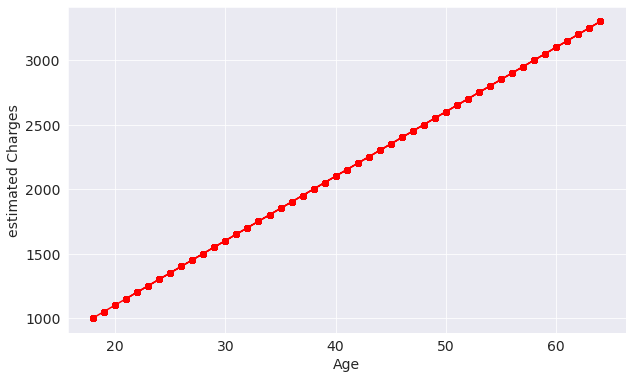

In [50]:
# We can plot the estimated charges using a line graph.
plt.plot(ages, estimated_charges,'r-o');
plt.xlabel('Age');
plt.ylabel('estimated Charges');
# And as expected, the points lie on a straight line: This is what we've assumed: we've assumed that there's a linear relationship.

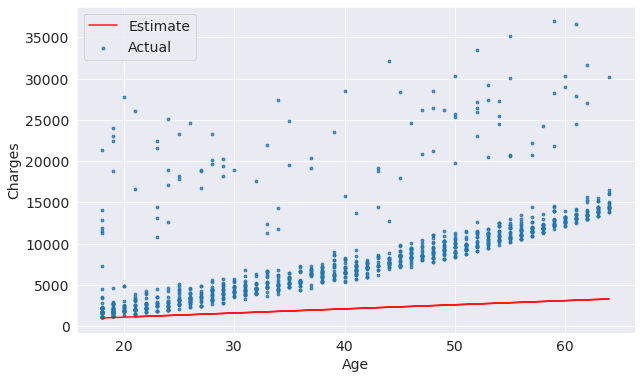

In [51]:
# We can overlay this line on the actual data, so see how well our model fits the data. We want to know how good our model is.
target = non_smoker_df.charges
plt.plot(ages, estimated_charges, 'r', alpha = 0.9); #To plot the line
plt.scatter(ages, target, s=8, alpha= 0.8); # To plot the points.
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

In [52]:
# Obviously, this is pretty bad.. However, we can try different values of w and b to move the line around. Let's define a helper function "try_parameters" which takes 
# w and b as inputs and create the above plot.
def try_parameters(w,b):
    ages = non_smoker_df.age
    estimated_charges = estimate_charges(ages, w, b)
    target = non_smoker_df.charges
    plt.plot(ages, estimated_charges, 'r', alpha = 0.9); #To plot the line
    plt.scatter(ages, target, s=8, alpha= 0.8); # To plot the points.
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);


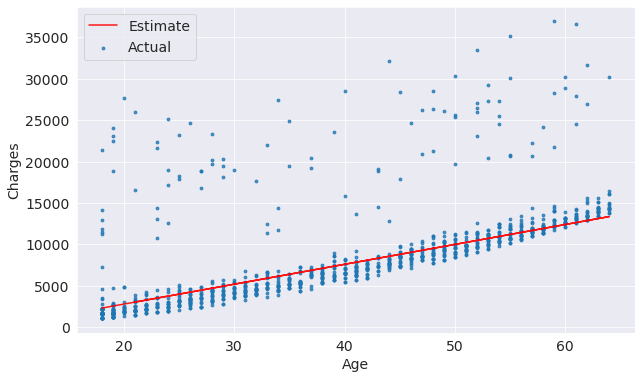

In [53]:
try_parameters(240,-2000)

In [54]:
# As we change the values, of w and b manually, trying to move the line visually closer to the points, we are learning the approximate relantionship between "age" and "charges".
# Wouldn't it be nice if a computer could try several different values of w and b and learn the relationship between "age" and "charges"? To do this, we need to solve 
# a couple of probles:
# 1- We need a way to measure numerically how well the line fits the points. --> Lost function
# 2- Once the "measure of fit" has been computed, we need a way to modify w and b to improve the fit. --> Gradient descent
# If we can solve the above problems, it should be possible for a computer to determine w and b for the best fit line, starting from a random guess.

In [55]:
 #Loss/Cost function
# We can compare our model's predictions with the actual targets using the following method:
#   -Calculate the difference between the targets and predictions (The difference is called the "residual")
#   -Square all elements of the difference matrix to remove negative values.
#   -Calculate the average of the elements in the resulting matrix: Divide by N
#   -Take the square root of the result(racine carré)
# ==> The result is a single number, known as the root mean squared error (RMSE).
# There's also root mean absolute error (RMAE), where we do absolute instead of square: The difference between them, is that is RMSE, the outliers contribute highly 
# because the greater the error is, the greater squared is going to be; So it's going to be a bigger factor in the overall error.
# RMSE = SQRT( [sum(predicted-actual)²]/N) 


In [56]:
import numpy as np

In [57]:
def rmse (targets, predictions):
    return np.sqrt(np.mean(np.square(targets-predictions)))

In [58]:
# Let's compute the RMSE for our model with a sample set of weights.
w = 50
b = 100


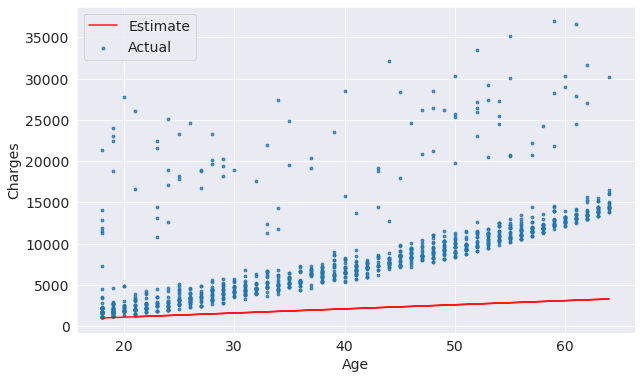

In [59]:
try_parameters(w,b)

In [60]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)


In [61]:
rmse(targets,predicted)

8461.949562575488

In [66]:
# Here's how we can interpret the above number: On average, each element in the prediction differs from the actual target by $8461 (That's not the exact interpretation, but
# it's pretty close).
# The result is called the loss, because it indicates how bad the model is at predicting the target variables. It represents information loss in the model: the lower the loss,
# the better the model.
# Let's modify the 'try_parameters' functions to also display the loss
def try_parameters(w,b):
    ages = non_smoker_df.age
    estimated_charges = estimate_charges(ages, w, b)
    target = non_smoker_df.charges
    plt.plot(ages, estimated_charges, 'r', alpha = 0.9); #To plot the line
    plt.scatter(ages, target, s=8, alpha= 0.8); # To plot the points.
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

    loss = rmse(target,estimated_charges)
    print("RMSE Loss: ", loss)
    

RMSE Loss:  4780.167090873231


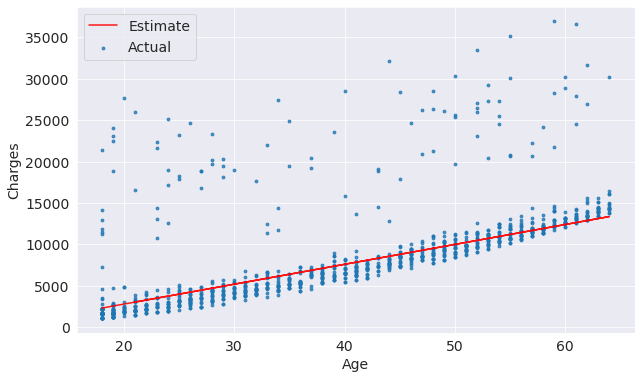

In [71]:
try_parameters(240,-2000)

In [ ]:
###OPTIMIZER
# Next, we need a strategy to modify weights w and b to reduce the loss and improve the "fit" of the line to the data.
# And there're a couple of strategies that are used to do this.
# *Ordinary least squares: https://www.youtube.com/watch?v=szXbuO3bVRk (better for smaller datasets).
# *Stochastic gradient descent: https://www.youtube.com/watch?v=sDv4f4s2SB8 (StatQuestvideo) (better for larger datasets)
# Both of these have the same objective: To minimize the loss, however, while ordinary least squares directly computes the best values for w and b using matrix operations,  
# gradient descent uses an iterative approach, starting with a random values of w and b and slowly improving them using derivatives.

In [ ]:
# In practice, we'll never have to implement either of these methods ourselves. We can use a library like scikit-learn to do this for us.

## Linear Regression using Scikit-learn

In [74]:
#Scikit-learn contains functions, modules, for doing machine learning with python. It's one of the most, most used libraries in the world for machine learning.
# And we're going to start out by using the simplest function that it offers which is the linear regression class.
# So, we're looking to find the best fit line for 'age' Vs. 'Charges' using the ordinary least squares optimization technique
from sklearn.linear_model import LinearRegression

In [75]:
#First, we create a new model object
model = LinearRegression()

In [76]:
#Next, we can use the 'fit' method of the model to find the best fit line for the inputs and targets

In [77]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [78]:
# In our case: n_features = 1, but important thing is that X must be a 2-d array, so we'll need to pass a dataframe, instead of a single column
# And the n_targets, also, equals to 1.

In [95]:
#Not like this, because this is going to give me a series, and it has just one dimension (1064,). However, the model.fit requires 2 dimensions.
inputs = non_smoker_df.age
type(inputs)

pandas.core.series.Series

In [96]:
#Instead.. Like this:
inputs = non_smoker_df[['age']]
type(inputs)

pandas.core.frame.DataFrame

In [84]:
targets = non_smoker_df.charges

In [85]:
print('inputs.shape: ', inputs.shape)
print('targets.shape: ', targets.shape)

inputs.shape:  (1064, 1)
targets.shape:  (1064,)


In [86]:
#Let's now fit the model to the data
model.fit(inputs,targets)

LinearRegression()

In [94]:
# We can now make predictions using the model. Let's try predicting the chargs for the ages 23, 37, and 61.
model.predict(np.array([[18],
                       [37],
                       [61]]))

/home/nour/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 2719.0598744 ,  7796.78921819, 14210.76312614])

In [98]:
# Do these values seem reasonable? Compare them with the scatter plot above.
# Let compute the predictions for the entire set of inputs
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [99]:
#Let's compute the RMSE loss to evaluate the model.
rmse(targets,predictions)

4662.505766636391

In [ ]:
hour 1:35